In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [3]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


So you're looking to apply to college? Awesome! Got your eyes on a 2025 QS top ranked program? That's great too! But hang on a moment: there are a lot of elements that go into picking a school. You can't apply everywhere, nor can you get accepted at every school on Earth. Plus, applications are expensive! So where are you going to focus on applying?

In order to help you make an informed decision, we want to first make you aware of what kinds of schools are out there. We’ll assume for now that you are interested specifically in going to college at one of the schools ranked within the 2024/2025 QS World University top schools list.

Often, a first consideration for a student when picking a school is geographic location. Do they want to stay close to home, or are they willing to go to school somewhere far away? Let us assume that domestic universities would be considered closer to home, and that anything outside of the US would be considered far away. So based on the ranking data, does it look like we have more strong options for you within the US, or outside of the US?

In [4]:
df["isUS"] = df.location == "US"

/tmp/ipykernel_1058960/3182490456.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plotIsUS.set_xticklabels(["Outside of the US","Within the US"])


Text(0.5, 0, 'Location')

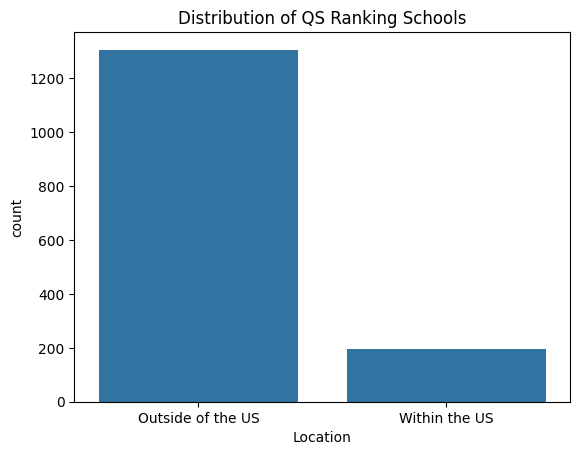

In [5]:
plotIsUS = sns.countplot(data=df,x="isUS")
plotIsUS.set_title("Distribution of QS Ranking Schools")
plotIsUS.set_xticklabels(["Outside of the US","Within the US"])
plotIsUS.set_xlabel("Location")

> Nice and simple off the bat. I would challenge you to find a second dimension that makes logical sense to add with color. 

When we examine the number of schools in the dataset, counting the number of US vs OUS schools, we see that the vast majority are outside of the US! So if you're sticking to applying to this list, your options are going to be more limited if you opt to stay closer to home.

In [14]:
for index in range(df.shape[0]):
    if df.loc[index,"2025_rank"] < 101:
        df.loc[index,"is2025Top100"] = True
    else:
        df.loc[index,"is2025Top100"] = False

df

# Same issue as the previous code block

TypeError: '<' not supported between instances of 'str' and 'int'

Perhaps another value of interest is in looking at schools that have been improving in their rankings. Let’s create a scatterplot comparing 2024 ranking vs 2025 ranking, and use the US/OUS variable as a hue to separate them by color. (Alternatively, we could create a named field for the rank change, and make a line plot of the RankChange, comparing US vs OUS to see whether US or foreign schools are generally improving more in the last year).

<Axes: xlabel='2024_rank', ylabel='2025_rank'>

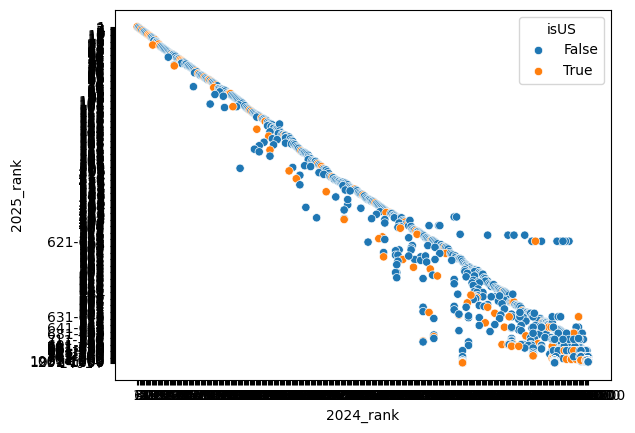

In [ ]:
sns.scatterplot(data=df,x="2024_rank",y="2025_rank",hue="isUS")

> I think its clear that these tick labels needs to be rotate or adjusted. As you noted these seem to bs string columns which is making it not sort correctly. Take a look at some other notebooks from your classmates as I think this problem was solved by others. 

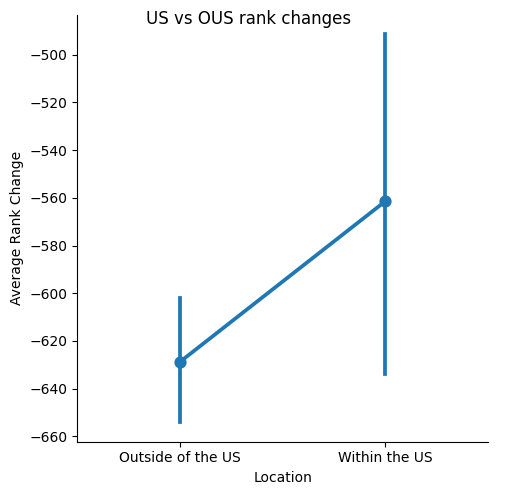

In [ ]:
df["2024ranksNumeric"] = pd.to_numeric(df['2024_rank'],errors='coerce')
df["2025ranksNumeric"] = pd.to_numeric(df['2025_rank'],errors='coerce')
df["rankChange"] = df["2025ranksNumeric"] - df["2024ranksNumeric"]

# Convert NaN values in rankChange to "-999"
df["rankChange"] = df["rankChange"].fillna(-999)



plotRankChanges = sns.catplot(data=df,x="isUS",y="rankChange",kind="point")
plotRankChanges.fig.suptitle("US vs OUS rank changes")
plotRankChanges.set_xticklabels(["Outside of the US","Within the US"])
plotRankChanges.set(xlabel="Location",ylabel="Average Rank Change")

> I REALLY like this plot. Well done. Showing that the drop in ranking was more drastic for US schools than other schools. However, when you filled NA with -999 it skewed the plots. Try dropna() instead

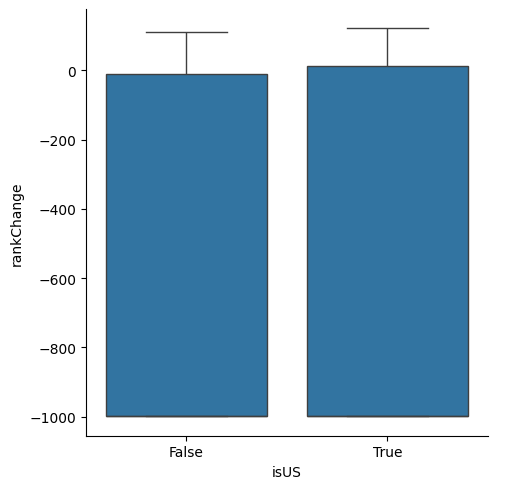

In [ ]:
plotRankChanges = sns.catplot(data=df,x="isUS",y="rankChange",kind="box")

> I would clean up the names of the axis a bit to make them more readable. This also has the same problem that the other plot has with the -999. That is skeqing the IQR so heavily that we cannot actually see the median line at all ane there is no real range.

Why are the values on our line plot showing an average change of 550-650 points? This is occurring because some schools have no rank for 2024, but a rank in the 500-600 range for 2025. Seaborn is treating these cases as if the 2024 value is 0, meaning the delta values for these lines of the dataset are in the hundreds.

Let's look at sustainability scores next. I'm assuming you really want to go to a school that's invested in sustainability. We want to see if larger schools are better ranked on sustainability than smaller schools. Let’s look at plots for each of the four sizes, side by side. We want to look at their sustainability scores within each size category, and see if the average sustainability score / spread is better for a particular size category.

[Text(0.5, 0, 'Sustainability Score'), Text(0, 0.5, 'Size Class')]

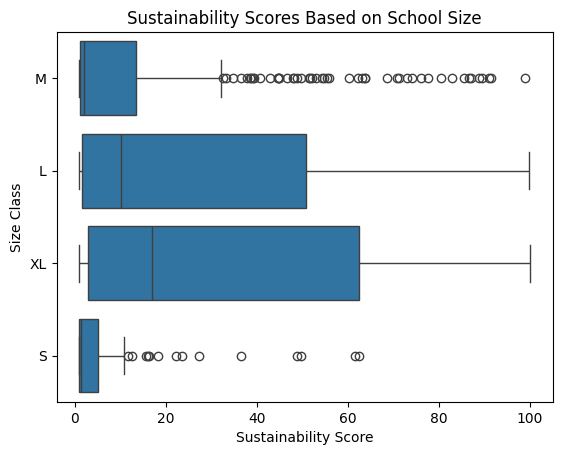

In [ ]:
plotSustainabilityScores = sns.boxplot(data=df,x='sustainability',y='size')

plotSustainabilityScores.set_title("Sustainability Scores Based on School Size")
#plotRankChanges.set_xticklabels(["Outside of the US","Within the US"])
plotSustainabilityScores.set(xlabel="Sustainability Score",ylabel="Size Class")

> This is great! Clearly the larger schools are making more progress on sustainability. 

Aha! It appears that the median sustainability score tends to be much lower at small and medium sized schools. 75% of medium schools had a sustainability score below 20, though there are many outliers. Large and XL sized schools have a greater spread in their data, but we can see that their median sustainability scores are 10 points higher, and almost half of their scores are over 20 points higher!

What about when we compare the domestic vs. international options again?

[Text(0.5, 0, 'Sustainability Score'), Text(0, 0.5, 'Size Class')]

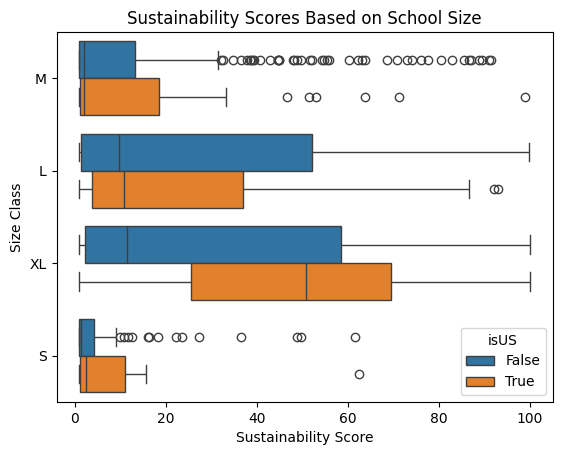

In [ ]:
plotSustainabilityScores2 = sns.boxplot(data=df,x='sustainability',y='size',hue='isUS')

plotSustainabilityScores2.set_title("Sustainability Scores Based on School Size")
#plotRankChanges.set_xticklabels(["Outside of the US","Within the US"])
plotSustainabilityScores2.set(xlabel="Sustainability Score",ylabel="Size Class")

> EXCELLENT follow up. Showing that the pattern you just saw is not universal around the world. 

Oh my! While we see similarity in the median US/OUS values within each size class, there's a very clear difference in the XL schools. It looks like if you've got your heart set on a very large school that values sustainability, you're going to do much better with the US schools; their data is centered on a much higher median and average for the sustainability score.

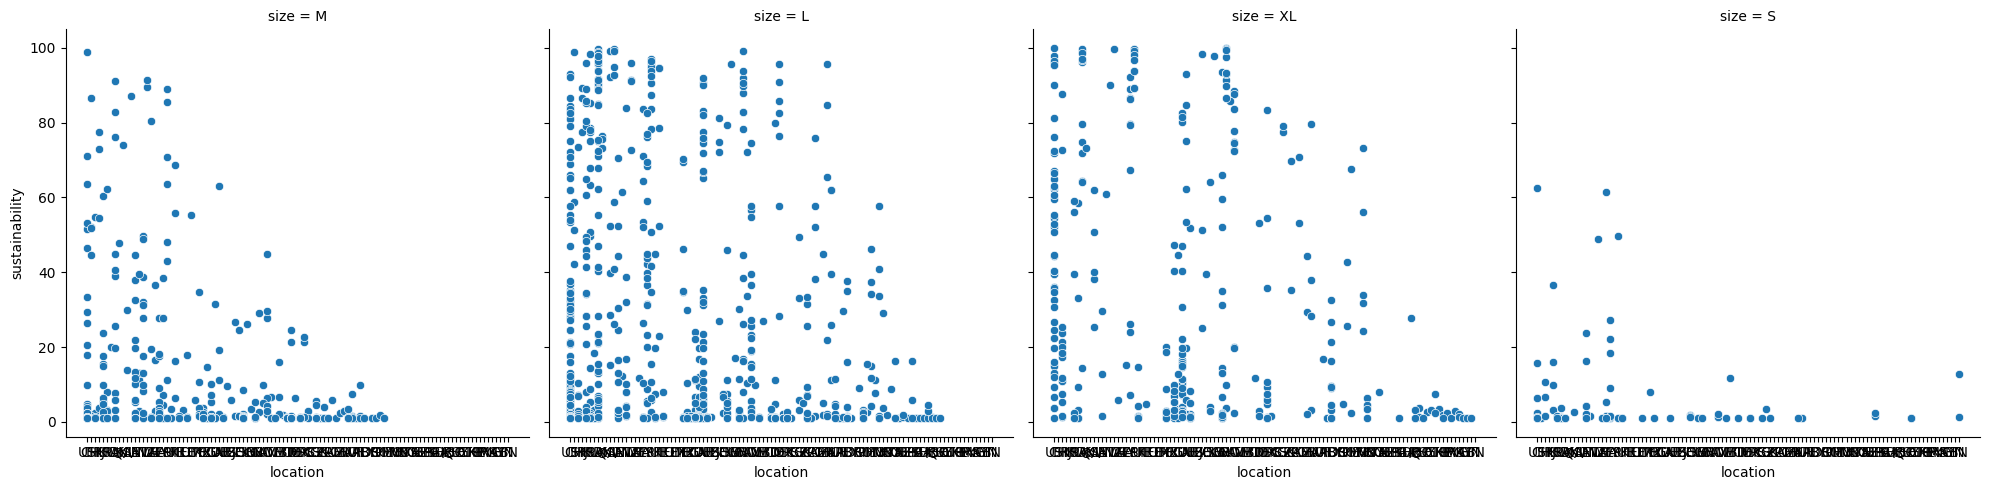

In [ ]:
m = sns.relplot(data=df, x='location', y='sustainability', col="size")

> Scatter plot only makes sense with to conintuous variables. Location being categorical this is not a good approach. I would try to find a better visual here. Size is also categorical. 

When choosing a school, another important factor to consider is the likelihood that you’ll find a job upon graduation. But which factors best correlate with better job placement? Is it simply related to the school’s academic reputation? Does it correlate with the faculty student ratio? Let’s find out!

<Axes: xlabel='academic_reputation', ylabel='employment_outcomes'>

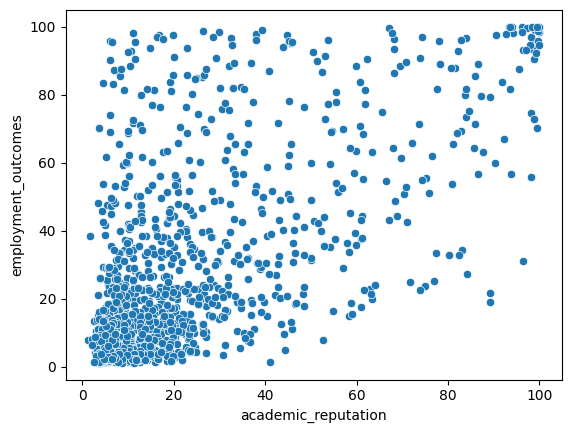

In [ ]:
sns.scatterplot(data=df, x='academic_reputation', y='employment_outcomes')

> This is a good start. Clean up the labels on the axes. I would also explore how you can use size or color to add a third dimension to this. 

<Axes: xlabel='faculty_student', ylabel='employment_outcomes'>

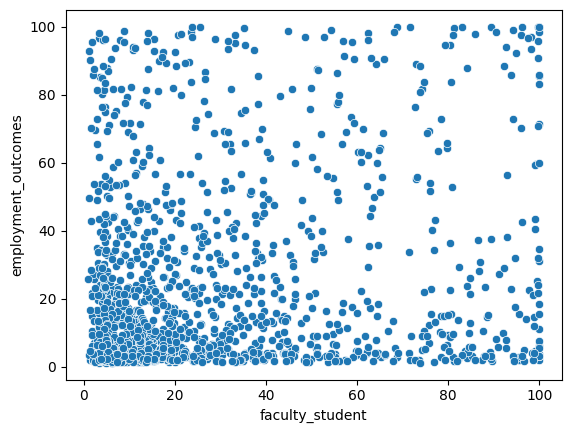

In [ ]:
sns.scatterplot(data=df, x='faculty_student', y='employment_outcomes')

> A label here is very needed. It is not clear at all what "faculty_student" means. Same feedback as the last plot. 

Interestingly, there doesn't seem to be much of a correlation between either a school's academic reputation or its faculty-student ratio and its rating for job placement (employment_outcomes). However, this is for all of the data points plotted together. What if we break this out by country and look for correlations?

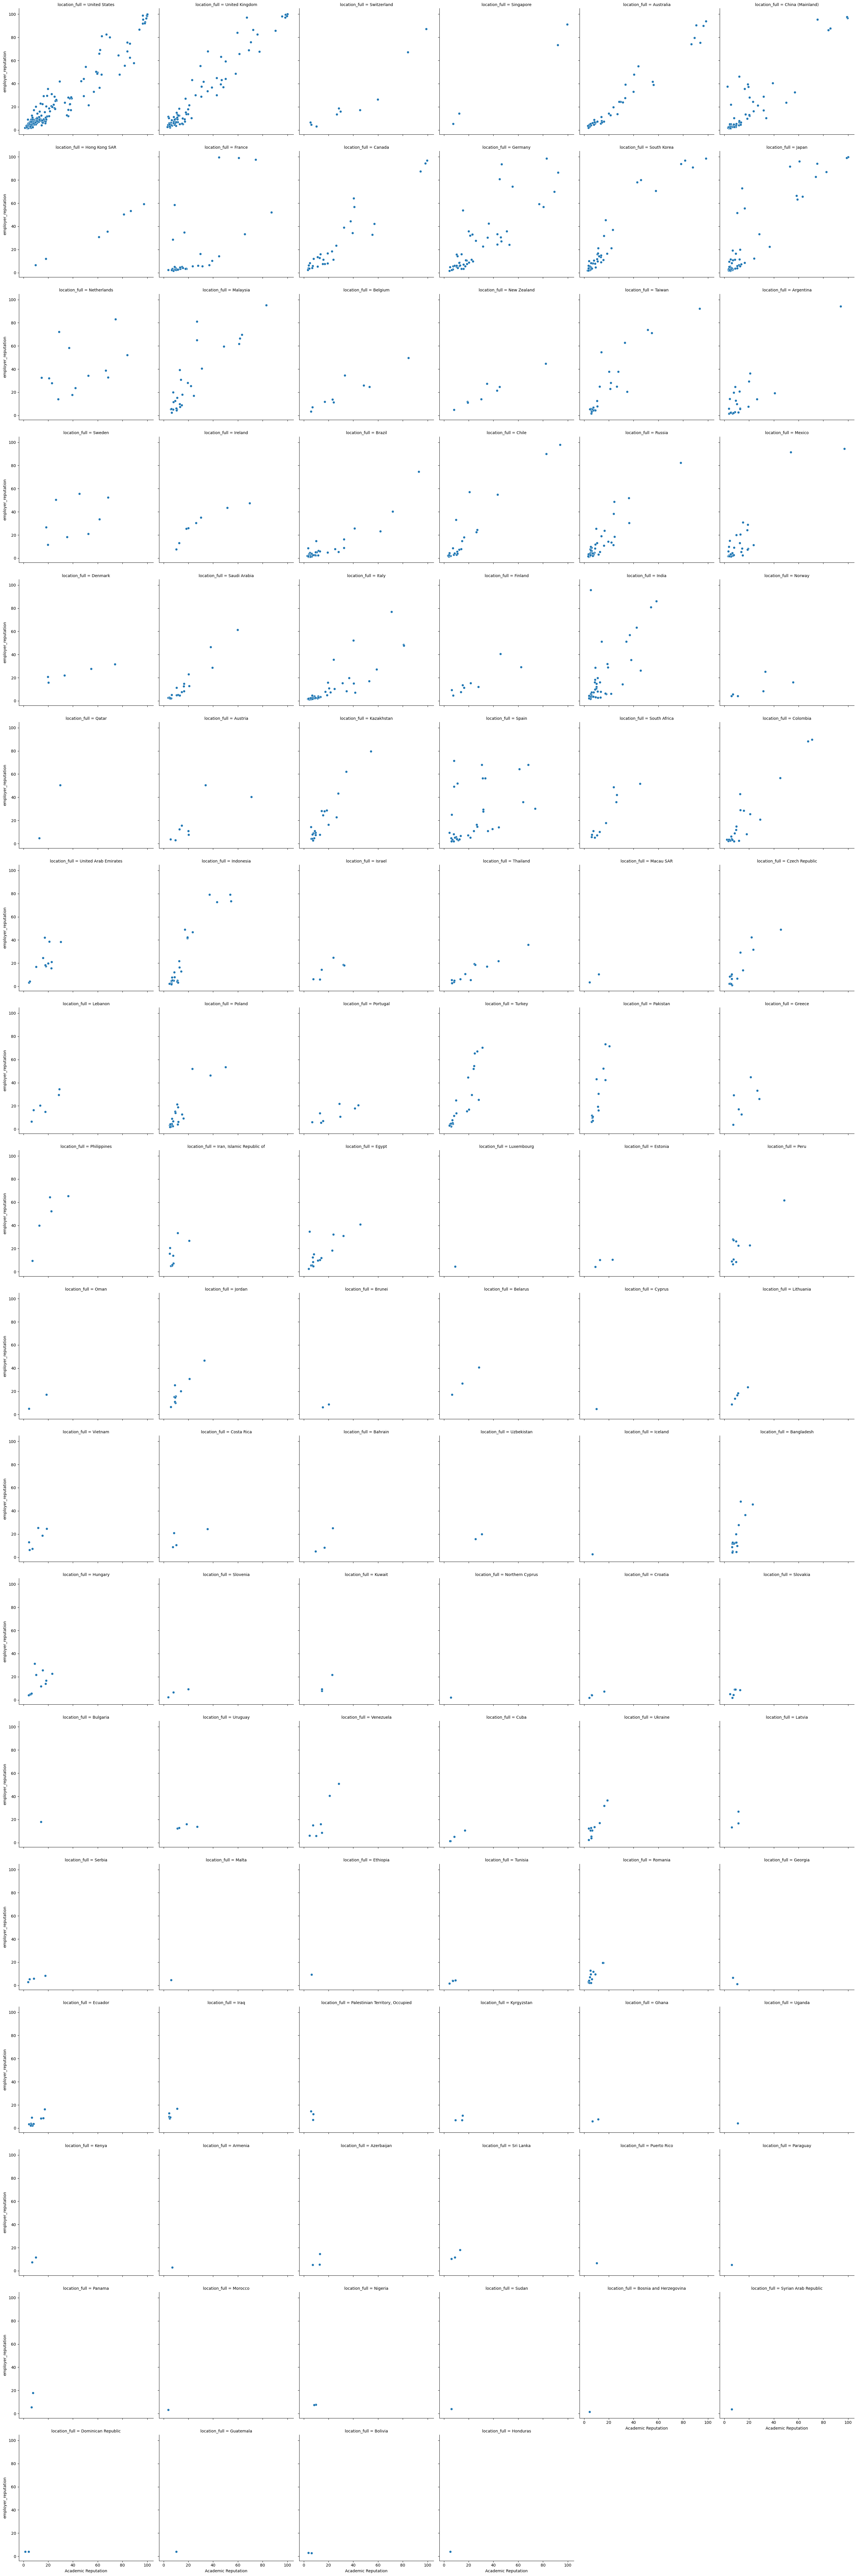

In [ ]:
g = sns.relplot(x='academic_reputation', y='employer_reputation', data=df, kind='scatter',col='location_full', col_wrap=6)
g.set(xlabel='Academic Reputation')

> This is far far too many countries to be included. This plot is not readable. Find some metric like size or top 20 to filter down to just a few countries. 

It seems that the importance of academic reputation really varies by country. For the United States and UK data, we clearly see a positive correlation (as seen below in the two plots with all PINK data points):

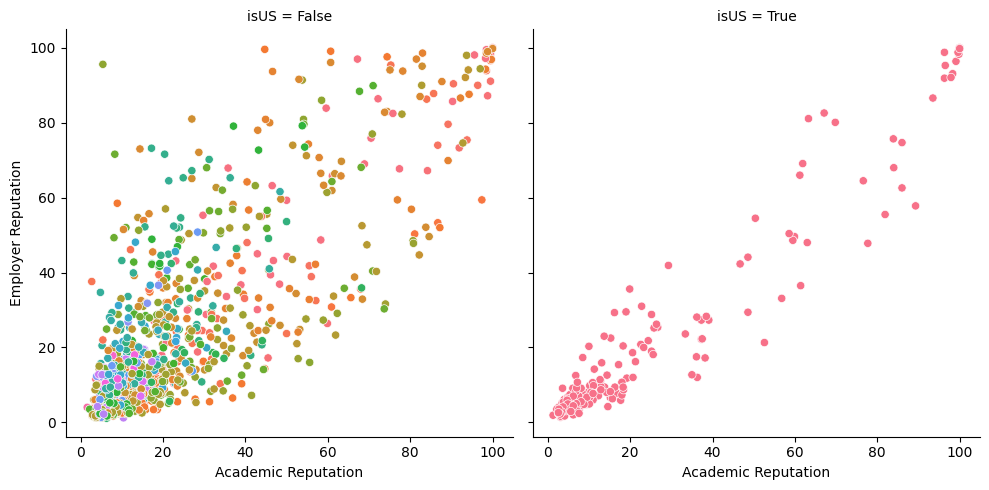

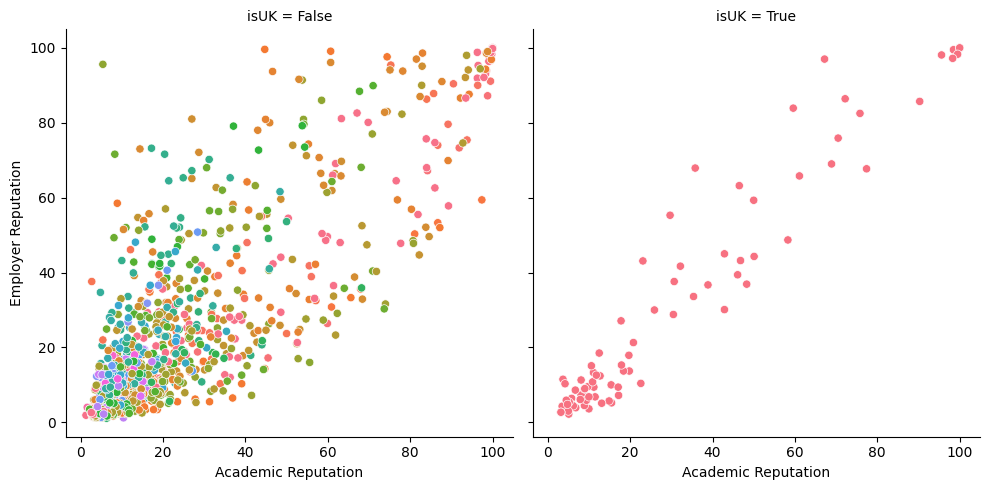

In [ ]:
df["isUK"] = (df.location == "UK")
k = sns.relplot(x='academic_reputation', y='employer_reputation', data=df, kind='scatter',col='isUS', hue='location',legend=False)
k2 = sns.relplot(x='academic_reputation', y='employer_reputation', data=df, kind='scatter',col='isUK', hue='location',legend=False)
k.set(xlabel='Academic Reputation', ylabel='Employer Reputation')
k2.set(xlabel='Academic Reputation', ylabel='Employer Reputation')

# Trying to plot this as a regression plot, so far unsuccessfully.....










# k = sns.scatterplot(data=df, x='academic_reputation', y='employer_reputation', hue='location')
# g = sns.relplot(x='academic_reputation', y='employer_reputation', data=df, kind='scatter',col='location_full', col_wrap=6)
# g.set(xlabel='Academic Reputation')

# plotIsUSorUK = sns.countplot(data=df,x="isUSorUK")
# plotIsUSorUK.set_title("Distribution of QS Ranking Schools")
# plotIsUSorUK.set_xticklabels(["Outside of the US","Within the US"])
# plotIsUSorUK.set_xlabel("Location")

> This is so close! You need a legend to show what the colors mean. I would also use differnt color schemes so that the UK and US are not the same color. 

OK! So far, based on our wants, it looks like we should be focusing on applying to large or extra large US schools, but if we're interested in applying outside of the US, the large/extra large international schools would be the next best choice for us. And, since the two pink plots are showing fairly strong positive correlations, if we want to maximize the chances of our education being valued by prospective employers (i.e., picking a school with a high employer reputation score), we should target US or UK schools with a strong academic reputation.

Lastly, I understand you might be interested in getting an education from an institution that will likely expose you to a lot of different world views, and whether this will impact your likelihood of employment upon finishing school.

There are three elements included in our data that can give some insight into this: the number of international faculty, the number of international students, and the strength of the school's international research network. With a heatmap, we can look for a pattern!

In [ ]:
m = pd.crosstab(df["international_faculty"],df["international_students"],values=df["employment_outcomes"],aggfunc="mean").round(0).fillna(0)
m

international_students,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,98.9,99.1,99.2,99.3,99.4,99.5,99.6,99.8,99.9,100.0
international_faculty,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,6.0,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.1,4.0,33.0,46.0,0.0,0.0,0.0,10.0,0.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2,2.0,2.0,4.0,0.0,0.0,2.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.3,0.0,10.0,4.0,0.0,0.0,59.0,19.0,29.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4,4.0,6.0,9.0,4.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TypeError: Image data of dtype object cannot be converted to float

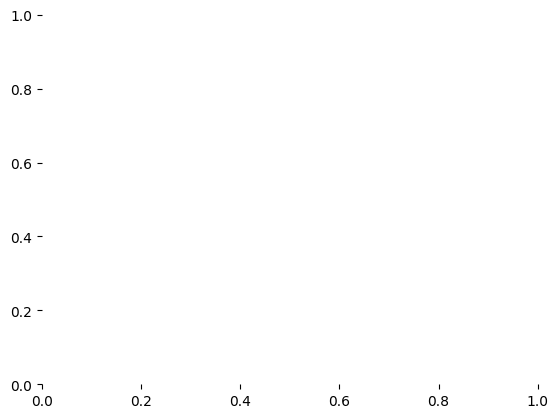

In [ ]:
# sns.heatmap(pd.crosstab(df["international_faculty"],df["international_students"],values=df["employment_outcomes"],aggfunc="mean").round(0).fillna(0))
sns.heatmap(m)

# This appears to not be working because there are some non-numeric values in our crosstab table, which cannot be used to color the heatmap.
# I do not know how to clean the data to fix this

So what have we found?

To maximize the chance of getting the education we want, we should apply to a US or UK school in the XL size class!